In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('data/spotify_data clean.csv')

In [24]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [38]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_release_date,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,2015-07-21 16:44:54.756466944,13.789443,3.492805
min,1.000000,0.000000,0.000000,0.000000e+00,1952-09-12 00:00:00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,2012-03-12 00:00:00,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,2018-02-14 00:00:00,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,2022-07-21 00:00:00,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,2025-10-31 00:00:00,181.000000,13.510000
std,6.052792,23.816076,19.645979,3.803180e+07,NaN,11.887131,1.057970


In [59]:
df.isnull().sum()

track_id                    0
track_name                  0
track_number                0
track_popularity            0
explicit                    0
artist_name                 3
artist_popularity           0
artist_followers            0
artist_genres            3361
album_id                    0
album_name                  0
album_release_date          0
album_total_tracks          0
album_type                  0
track_duration_min          0
track_popularity_cat        0
artist_popularity_cat       0
dtype: int64

In [60]:
# What percentage of your data is missing genres?
missing_percentage = (df['artist_genres'].isnull().sum() / len(df)) * 100
print(f"Missing genres: {missing_percentage:.2f}%")

Missing genres: 39.16%


In [25]:
df.dtypes

track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object

## Convert release date data type to datetime

In [26]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

In [27]:
df.dtypes

track_id                      object
track_name                    object
track_number                   int64
track_popularity               int64
explicit                        bool
artist_name                   object
artist_popularity              int64
artist_followers               int64
artist_genres                 object
album_id                      object
album_name                    object
album_release_date    datetime64[ns]
album_total_tracks             int64
album_type                    object
track_duration_min           float64
dtype: object

## Track Popularity Patterns

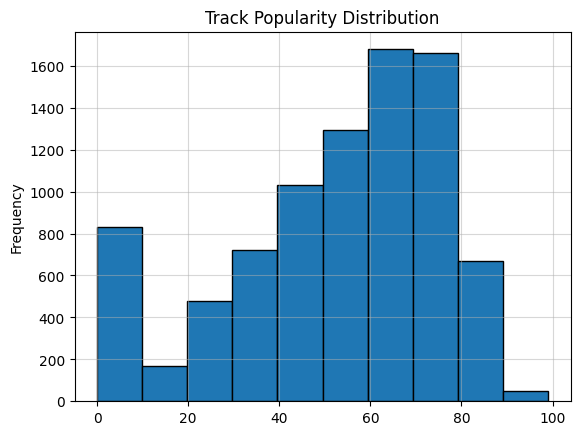

In [83]:
df['track_popularity'].plot(kind='hist',edgecolor='black')
plt.title('Track Popularity Distribution')
plt.grid(True, alpha=0.5)
# plt.savefig('images/t_popularity_dist')
plt.show()

In [39]:
def categorize_popularity(popularity):
    if popularity < 33:
        return 'Low'
    elif popularity < 67:
        return 'Medium'
    else:
        return 'High'

df['track_popularity_cat'] = df['track_popularity'].apply(categorize_popularity)

In [46]:
track_popularity_count = df['track_popularity_cat'].value_counts()
track_popularity_percentages = (track_popularity_count / len(df)) * 100

In [49]:
print("Track counts by popularity:")
print(track_popularity_count)
print("\nPercentages:")
print(track_popularity_percentages)

Track counts by popularity:
track_popularity_cat
Medium    4017
High      2912
Low       1653
Name: count, dtype: int64

Percentages:
track_popularity_cat
Medium    46.807271
High      33.931485
Low       19.261244
Name: count, dtype: float64


This distribution suggests that most tracks in our dataset fall into the medium popularity range, with more high-popularity tracks than low-popularity ones.
This could indicate that our dataset is somewhat skewed toward more popular tracks (possibly from well-known artists or playlists).

## Artist Popularity vs Track Popularity

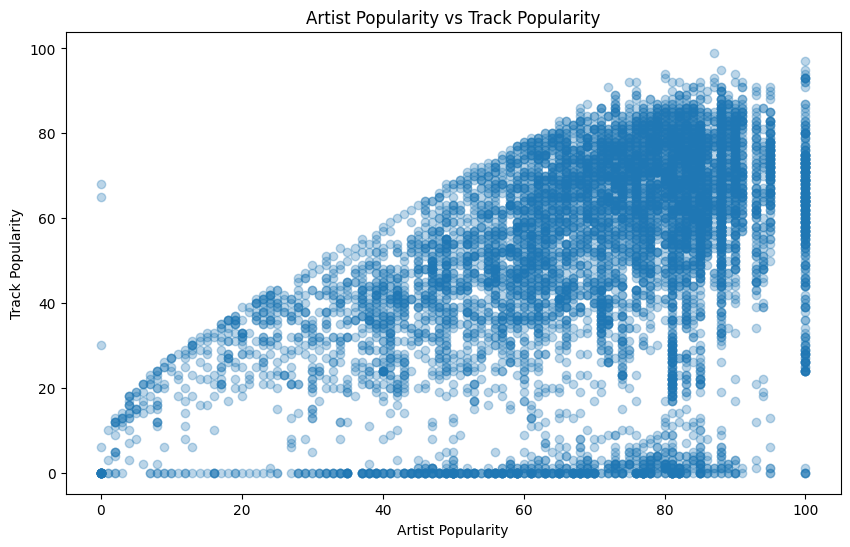

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(df['artist_popularity'], df['track_popularity'], alpha=0.3)
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.title('Artist Popularity vs Track Popularity')
plt.show()

Strong Positive Relationship: There's a clear upward trend - as artist popularity increases, track popularity tends to increase as well.

In [54]:
popularity_corr = df[['artist_popularity','track_popularity']].corr()

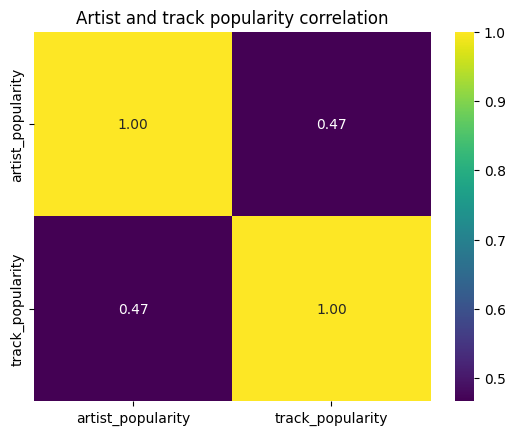

In [84]:
sns.heatmap(popularity_corr,annot=True, cmap='viridis', fmt=".2f")
plt.title('Artist and track popularity correlation')
# plt.savefig('images/t_popularity_corr')
plt.show()

**Positive relationship exists** Popular artists do tend to produce more popular tracks, but it's far from a perfect relationship.

## Genre Impact on Popularity

In [62]:
df_with_genres = df[df['artist_genres'].notna()].copy()

In [71]:
genre_popularity = df_with_genres.groupby('artist_genres')['track_popularity'].mean().sort_values(ascending=False)

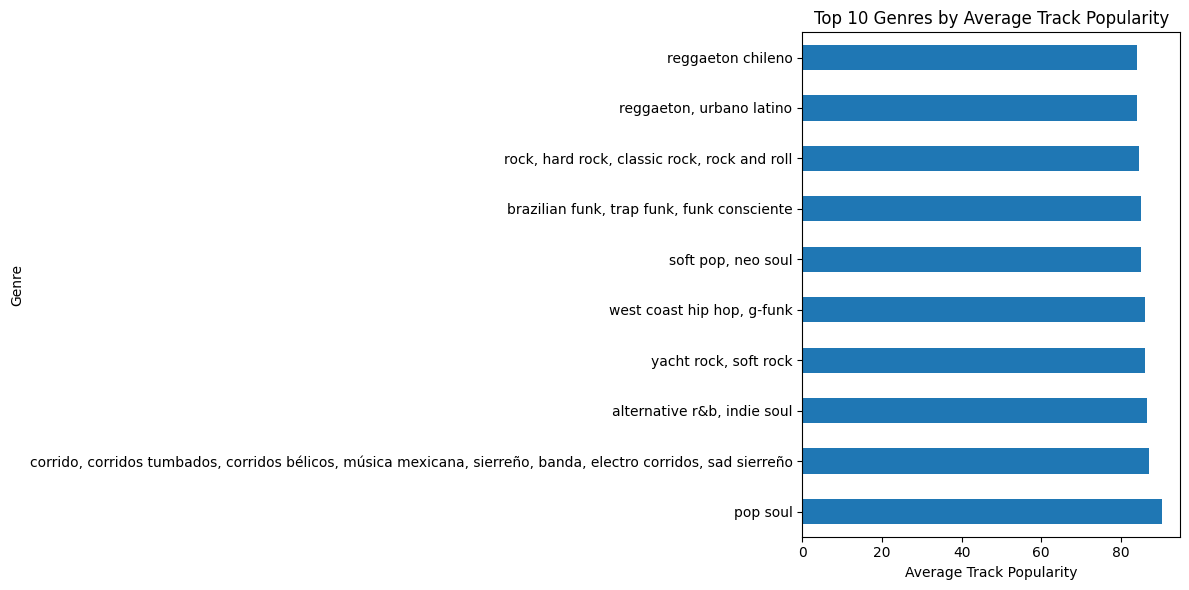

In [73]:
top_n = 10  # Adjust as needed
plt.figure(figsize=(12, 6))
genre_popularity.head(top_n).plot(kind='barh')
plt.xlabel('Average Track Popularity')
plt.ylabel('Genre')
plt.title(f'Top {top_n} Genres by Average Track Popularity')
plt.tight_layout()
plt.show()

**Top Ranking Genres:**

The highest-ranking genre is **Reggaeton Chileno**, with an average popularity score of around 88.

It is closely followed by other genres like **Reggaeton/Urbano Latino**, various forms of Rock, and Brazilian Funk.
The long label for various Mexican regional music styles (corrido, banda, etc.) also shows a very high average popularity, indicating a strong performance for this category.

## Artist Influence & Reach

In [75]:
influence_corr = df[['artist_popularity','track_popularity','artist_followers']].corr()

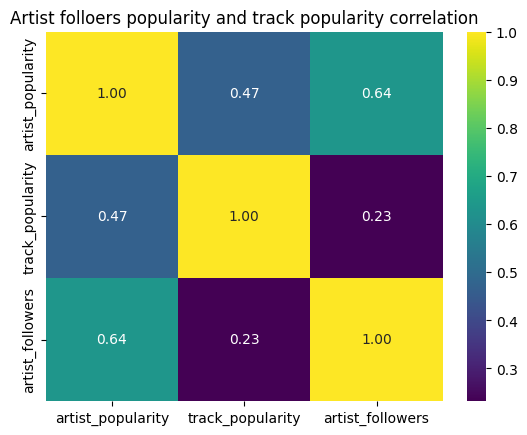

In [77]:
sns.heatmap(influence_corr,annot=True, cmap='viridis', fmt=".2f")
plt.title('Artist folloers popularity and track popularity correlation')
plt.show()

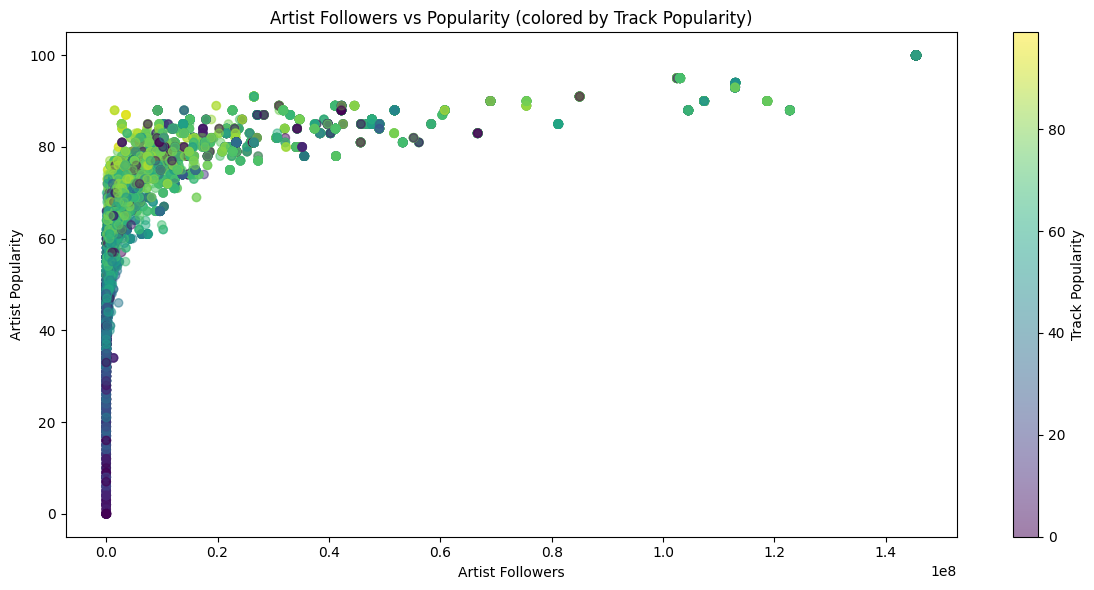

In [85]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['artist_followers'], df['artist_popularity'], 
                     c=df['track_popularity'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Track Popularity')
plt.xlabel('Artist Followers')
plt.ylabel('Artist Popularity')
plt.title('Artist Followers vs Popularity (colored by Track Popularity)')
plt.tight_layout()
# plt.savefig('images/artist_features_scatter')
plt.show()

Strong logarithmic/exponential relationship: Artist followers and artist popularity have a clear positive relationship, but it's not linear - there's a steep curve at the lower end that flattens out at higher follower counts.
Plateau effect: Once artists reach ~40-50 million followers, their popularity score plateaus around 80-95. This suggests Spotify's popularity metric has a ceiling effect.
Track popularity variation (the colors):

Yellow/green points (high track popularity 60-100) are scattered throughout
Dark blue/purple points (low track popularity 0-20) are clustered at the bottom left
Even mega-popular artists (100M+ followers, 90+ popularity) have tracks with varying popularity (colors range from teal to yellow)


Clustering at low followers: The dense vertical line at 0-10M followers shows most artists are in this range, with huge variation in both artist and track popularity.